第五题：


**题目：﻿﻿通过梯度下降法，给出 Logistic 回归模型的求解过程，请写出详细的推导过程**

Logistic回归是一种广泛用于二元分类问题的统计分析方法。虽然它的名称中含有“回归”，但实际上它是用于分类任务的。在这里，我们将深入探讨如何通过梯度下降法手动解决Logistic回归问题。我们首先从Logistic回归模型的基本原理谈起，然后讨论梯度下降法如何应用于优化问题。

### Logistic 回归模型基础

1. **Sigmoid 函数**:
    Logistic回归使用Sigmoid函数，将线性回归结果映射到[0,1]区间，用于预测二元目标变量的概率。Sigmoid函数定义如下：
    $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$

2. **模型假设**:
   Logistic回归模型假设目标变量`y`的对数几率是输入`X`的线性组合。这里，`z`代表线性组合：`z = w^T X + b`，其中`w`是权重向量，`b`是偏差项。

3. **代价函数**:
   我们使用交叉熵损失函数，因为这会使得梯度下降优化更加有效。对于单个数据点，损失函数是：
   $$
   J(w, b) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z))
   $$
   对于整个训练集，代价函数是所有训练样本损失的平均。

### 梯度下降求解

梯度下降是一种迭代优化算法，用于最小化代价函数。基本思想是计算代价函数的梯度，并沿着减少最快的方向调整参数。

1. **计算梯度**:
   首先，我们需要计算代价函数相对于模型参数的梯度。对于权重`w`和偏差`b`，梯度计算如下：
   $$
   \frac{\partial J}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} (\sigma(z^{(i)}) - y^{(i)})x^{(i)}
   $$
   $$
   \frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (\sigma(z^{(i)}) - y^{(i)})
   $$
   其中`N`是训练样本的数量。

2. **更新规则**:
   然后，我们用以下规则更新参数：
   $$
   w = w - \alpha \frac{\partial J}{\partial w}
   $$
   $$
   b = b - \alpha \frac{\partial J}{\partial b}
   $$
   其中，`α`是学习率，控制我们更新参数的步长。

3. **迭代优化**:
   通过多次迭代过程，我们不断用计算出的梯度更新参数，直到代价函数收敛为止。

### 算法步骤总结

1. 初始化模型参数（通常初始化为0或小的随机值）。
2. 计算模型的预测输出。
3. 计算代价函数（损失）。
4. 计算代价函数的梯度。
5. 更新模型参数。
6. 重复步骤2-5，直到满足停止准则（例如，达到预定的迭代次数，或代价函数的改变非常小）。

通过这个过程，模型最终学习到数据的权重参数，用于对新的输入数据进行预测。这就是使用梯度下降法进行Logistic回归的基本过程。实际应用中可能需要考虑更多复杂的因素，如特征缩放、正则化以及更高级的优化算法等。

第六题：

In [2]:
from sklearn import datasets    #sklearn中包含很多数据集，其中就有鸢尾花数据集
from sklearn.model_selection import train_test_split

# 1. 读取数据文件
iris = datasets.load_iris()   #利用load函数装载数据集
# print('鸢尾花数据集的数据类型是：',type(iris))  
# print('鸢尾花数据集的数据有：',dir(iris))
print(iris['feature_names'])
X = iris['data']
y = iris['target']

# 2. 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_test)



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


第七题：

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 3. 数据标准化（通常对于Logistic回归是一个好的做法）
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4. 创建Logistic回归模型
clf = LogisticRegression(max_iter=5)  # max_iter定义了求解算法的最大迭代次数

# 5. 训练模型
clf.fit(X_train, y_train)

# 6. 进行预测
y_pred = clf.predict(X_test)

# 7. 计算和打印准确度
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 95.56%


d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


第八题：

In [5]:
from math import sqrt
counter = [0, 0, 0]
res = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
for i in range(len(X)):
    counter[y[i]] += 1
    res[y[i]] += X[i]

print("不同标签类别数据的中心点：")
for i in range(3):
    res[i] = res[i] / counter[i]
    print(res[i])

print("欧氏距离：")
dist = []
for i in range(len(X)):
    dist.append(0)
    for j in range(4):
        dist[i] += (X[i][j]-res[y[i]][j]) * (X[i][j]-res[y[i]][j])
    dist[i] = sqrt(dist[i])
print(dist)


不同标签类别数据的中心点：
[5.006 3.428 1.462 0.246]
[5.936 2.77  4.26  1.326]
[6.588 2.974 5.552 2.026]
欧氏距离：
[0.14135062787267683, 0.447638246802036, 0.41710909843828603, 0.5253379864430139, 0.18862661530123412, 0.6770376651265422, 0.4151867049894539, 0.06618156843109733, 0.8074527849973644, 0.3762711788059248, 0.4824727971606279, 0.2537321422287681, 0.5007793925472578, 0.9132250544088243, 1.0140907257242815, 1.2048153385477793, 0.6542018037272597, 0.14415269681833906, 0.8243664233822241, 0.38933276255665833, 0.46344363195538757, 0.32860310406324483, 0.6402968061766353, 0.3825963930828416, 0.4870112935035486, 0.45208406297944265, 0.20875823337056684, 0.21536016344718953, 0.21066561181170598, 0.4083870712938887, 0.4137390481934238, 0.4256524403782984, 0.7155277772385911, 0.9197717108065455, 0.34982852942548903, 0.35039977168942393, 0.5268586148104637, 0.25686572367678706, 0.7607759197030355, 0.11480418110852969, 0.18541844568434912, 1.2480304483465143, 0.6690142001482473, 0.38675573686759956, 0.60

第九题：

d:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


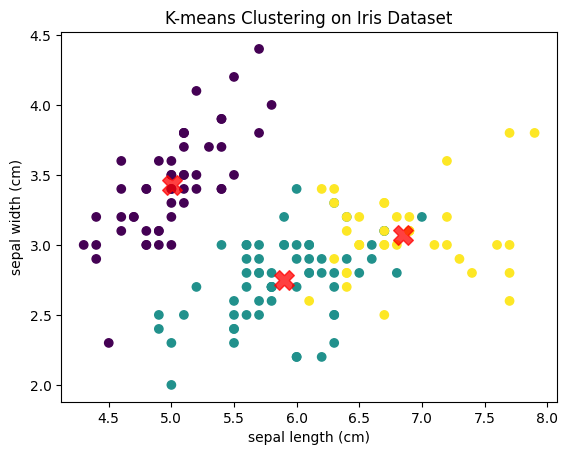

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# K-means聚类
kmeans = KMeans(n_clusters=3)  # 选择3作为聚类数量，因为我们知道有三类鸢尾花
kmeans.fit(X)

# 获取聚类标签和中心点
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')  # 根据K-means聚类的标签给每个点上色

# 画出聚类的中心点
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.75)

plt.title("K-means Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()